# Asistencia - Avances Proyecfo Final

### Juan M. González-Campo
### Lourdes Saavedra
### Manuel Rodas
### Wilfredo Gallegos
### Dolan Cuellar

## Carga de los datos

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import timedelta

In [11]:
df = pd.read_csv('DelayedFlights.csv')

## Limpieza de Datos

In [12]:

df = df.iloc[:, 1:]  # Eliminar la primera columna sin nombre
print(df.head())



   Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0  2008      1           3          4   2003.0        1955   2211.0   
1  2008      1           3          4    754.0         735   1002.0   
2  2008      1           3          4    628.0         620    804.0   
3  2008      1           3          4   1829.0        1755   1959.0   
4  2008      1           3          4   1940.0        1915   2121.0   

   CRSArrTime UniqueCarrier  FlightNum  ... TaxiIn  TaxiOut  Cancelled  \
0        2225            WN        335  ...    4.0      8.0          0   
1        1000            WN       3231  ...    5.0     10.0          0   
2         750            WN        448  ...    3.0     17.0          0   
3        1925            WN       3920  ...    3.0     10.0          0   
4        2110            WN        378  ...    4.0     10.0          0   

   CancellationCode  Diverted  CarrierDelay WeatherDelay NASDelay  \
0                 N         0           NaN          NaN   

In [13]:
# convertir a tipo de dato entero o bool
df['Year'] = df['Year'].astype(int)
df['Month'] = df['Month'].astype(int)
df['DayofMonth'] = df['DayofMonth'].astype(int)
df['DayOfWeek'] = df['DayOfWeek'].astype(int)
df['Cancelled'] = df['Cancelled'].astype(bool)
df['Diverted'] = df['Diverted'].astype(bool)


In [14]:
# Eliminar duplicados

df.drop_duplicates(inplace=True)

null_counts = df.isnull().sum().sort_values(ascending=False)
print("Cantidad de valores nulos por columna:\n", null_counts)



Cantidad de valores nulos por columna:
 LateAircraftDelay    689270
SecurityDelay        689270
NASDelay             689270
WeatherDelay         689270
CarrierDelay         689270
ActualElapsedTime      8387
AirTime                8387
ArrDelay               8387
ArrTime                7110
TaxiIn                 7110
TaxiOut                 455
CRSElapsedTime          198
TailNum                   5
UniqueCarrier             0
Cancelled                 0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
Diverted                  0
CancellationCode          0
Distance                  0
FlightNum                 0
Dest                      0
Origin                    0
DepDelay                  0
Month                     0
CRSArrTime                0
Year                      0
dtype: int64


In [15]:
# revisa si es mas de la mitad de los datos y si si, elimianrlos
df.dropna(thresh=df.shape[0]/2, axis=1, inplace=True)
# mostrar columna eliminadas
print("Columnas eliminadas por tener mas de la mitad de valores nulos:\n", null_counts[null_counts > df.shape[0]/2])

print(df.head())


Columnas eliminadas por tener mas de la mitad de valores nulos:
 Series([], dtype: int64)
   Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0  2008      1           3          4   2003.0        1955   2211.0   
1  2008      1           3          4    754.0         735   1002.0   
2  2008      1           3          4    628.0         620    804.0   
3  2008      1           3          4   1829.0        1755   1959.0   
4  2008      1           3          4   1940.0        1915   2121.0   

   CRSArrTime UniqueCarrier  FlightNum  ... TaxiIn  TaxiOut  Cancelled  \
0        2225            WN        335  ...    4.0      8.0      False   
1        1000            WN       3231  ...    5.0     10.0      False   
2         750            WN        448  ...    3.0     17.0      False   
3        1925            WN       3920  ...    3.0     10.0      False   
4        2110            WN        378  ...    4.0     10.0      False   

   CancellationCode  Diverted  Carrier

In [16]:
# si la celda esta vacia en las columnas  LateAircraftDelay, ecurityDelay, NASDelay, WeatherDelay, CarrierDelay cambiar a 0
df['LateAircraftDelay'].fillna(0, inplace=True)
df['SecurityDelay'].fillna(0, inplace=True)
df['NASDelay'].fillna(0, inplace=True)
df['WeatherDelay'].fillna(0, inplace=True)
df['CarrierDelay'].fillna(0, inplace=True)
null_counts = df.isnull().sum().sort_values(ascending=False)
print("Cantidad de valores nulos por columna:\n", null_counts)



C:\Users\rodas\AppData\Local\Temp\ipykernel_1716\2710520157.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LateAircraftDelay'].fillna(0, inplace=True)
C:\Users\rodas\AppData\Local\Temp\ipykernel_1716\2710520157.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

Cantidad de valores nulos por columna:
 ArrDelay             8387
AirTime              8387
ActualElapsedTime    8387
TaxiIn               7110
ArrTime              7110
TaxiOut               455
CRSElapsedTime        198
TailNum                 5
Cancelled               0
CancellationCode        0
Dest                    0
Diverted                0
CarrierDelay            0
WeatherDelay            0
NASDelay                0
SecurityDelay           0
Distance                0
Year                    0
Origin                  0
DepDelay                0
Month                   0
FlightNum               0
UniqueCarrier           0
CRSArrTime              0
CRSDepTime              0
DepTime                 0
DayOfWeek               0
DayofMonth              0
LateAircraftDelay       0
dtype: int64


In [17]:
#Eliminar las filas con valores nulos en ArrTime, CRSArrTime, ActualElapsedTime, CRSElapsedTime, AirTime, ArrDelay, DepDelay, TaxiIn, TaxiOut
df.dropna(subset=['ArrTime', 'CRSArrTime', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'TaxiIn', 'TaxiOut'], inplace=True)
null_counts = df.isnull().sum().sort_values(ascending=False)
print("Cantidad de valores nulos por columna:\n", null_counts)

Cantidad de valores nulos por columna:
 TailNum              3
Year                 0
DepDelay             0
SecurityDelay        0
NASDelay             0
WeatherDelay         0
CarrierDelay         0
Diverted             0
CancellationCode     0
Cancelled            0
TaxiOut              0
TaxiIn               0
Distance             0
Dest                 0
Origin               0
ArrDelay             0
Month                0
AirTime              0
CRSElapsedTime       0
ActualElapsedTime    0
FlightNum            0
UniqueCarrier        0
CRSArrTime           0
ArrTime              0
CRSDepTime           0
DepTime              0
DayOfWeek            0
DayofMonth           0
LateAircraftDelay    0
dtype: int64


## EDA

### Transformación de Variables

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1928369 entries, 0 to 1936757
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int32  
 1   Month              int32  
 2   DayofMonth         int32  
 3   DayOfWeek          int32  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          bool   
 22  CancellationCode   object 
 23  Diverted           bool   
 24  CarrierDelay       float64
 25  WeatherDelay       floa

Transformaciones de variables

In [19]:
# Modificar tipos y crear columna de fecha
df['Cancelled'] = df['Cancelled'].astype('category')
df['FlightNum'] = df['FlightNum'].astype('object')
df['TailNum'] = df['TailNum'].astype('object')
df['flightDate'] = df['Year'].astype(str) + '-' + df['Month'].astype(str) + '-' + df['DayofMonth'].astype(str)
df["DepTime"] = df["DepTime"].astype(str)
df["CRSDepTime"] = df["CRSDepTime"].astype(str)
df["ArrTime"] = df["ArrTime"].astype(str)
df["CRSArrTime"] = df["CRSArrTime"].astype(str)
df["Month"] = df["Month"].astype('category')
df["DayofMonth"] = df["DayofMonth"].astype('category')
df["DayOfWeek"] = df["DayOfWeek"].astype('category')
df["Year"] = df["Year"].astype('category')
df['flightDate'] = pd.to_datetime(df['flightDate'])
df["UniqueCarrier"] = df["UniqueCarrier"].astype('category')
df["Diverted"] = df["Diverted"].astype('category')


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1928369 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Year               category      
 1   Month              category      
 2   DayofMonth         category      
 3   DayOfWeek          category      
 4   DepTime            object        
 5   CRSDepTime         object        
 6   ArrTime            object        
 7   CRSArrTime         object        
 8   UniqueCarrier      category      
 9   FlightNum          object        
 10  TailNum            object        
 11  ActualElapsedTime  float64       
 12  CRSElapsedTime     float64       
 13  AirTime            float64       
 14  ArrDelay           float64       
 15  DepDelay           float64       
 16  Origin             object        
 17  Dest               object        
 18  Distance           int64         
 19  TaxiIn             float64       
 20  TaxiOut            float64   

### Exploración

In [21]:
# Estadísticas descriptivas
print(df.describe())

       ActualElapsedTime  CRSElapsedTime       AirTime      ArrDelay  \
count       1.928369e+06    1.928369e+06  1.928369e+06  1.928369e+06   
mean        1.333059e+02    1.341977e+02  1.082772e+02  4.219988e+01   
min         1.400000e+01   -2.100000e+01  0.000000e+00 -1.090000e+02   
25%         8.000000e+01    8.200000e+01  5.800000e+01  9.000000e+00   
50%         1.160000e+02    1.160000e+02  9.000000e+01  2.400000e+01   
75%         1.650000e+02    1.650000e+02  1.370000e+02  5.600000e+01   
max         1.114000e+03    6.600000e+02  1.091000e+03  2.461000e+03   
std         7.206010e+01    7.123342e+01  6.864264e+01  5.678474e+01   

           DepDelay      Distance        TaxiIn       TaxiOut  CarrierDelay  \
count  1.928369e+06  1.928369e+06  1.928369e+06  1.928369e+06  1.928369e+06   
mean   4.309169e+01  7.649487e+02  6.811386e+00  1.821733e+01  1.240739e+01   
min    6.000000e+00  1.100000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.200000e+01  3.380000e+02  

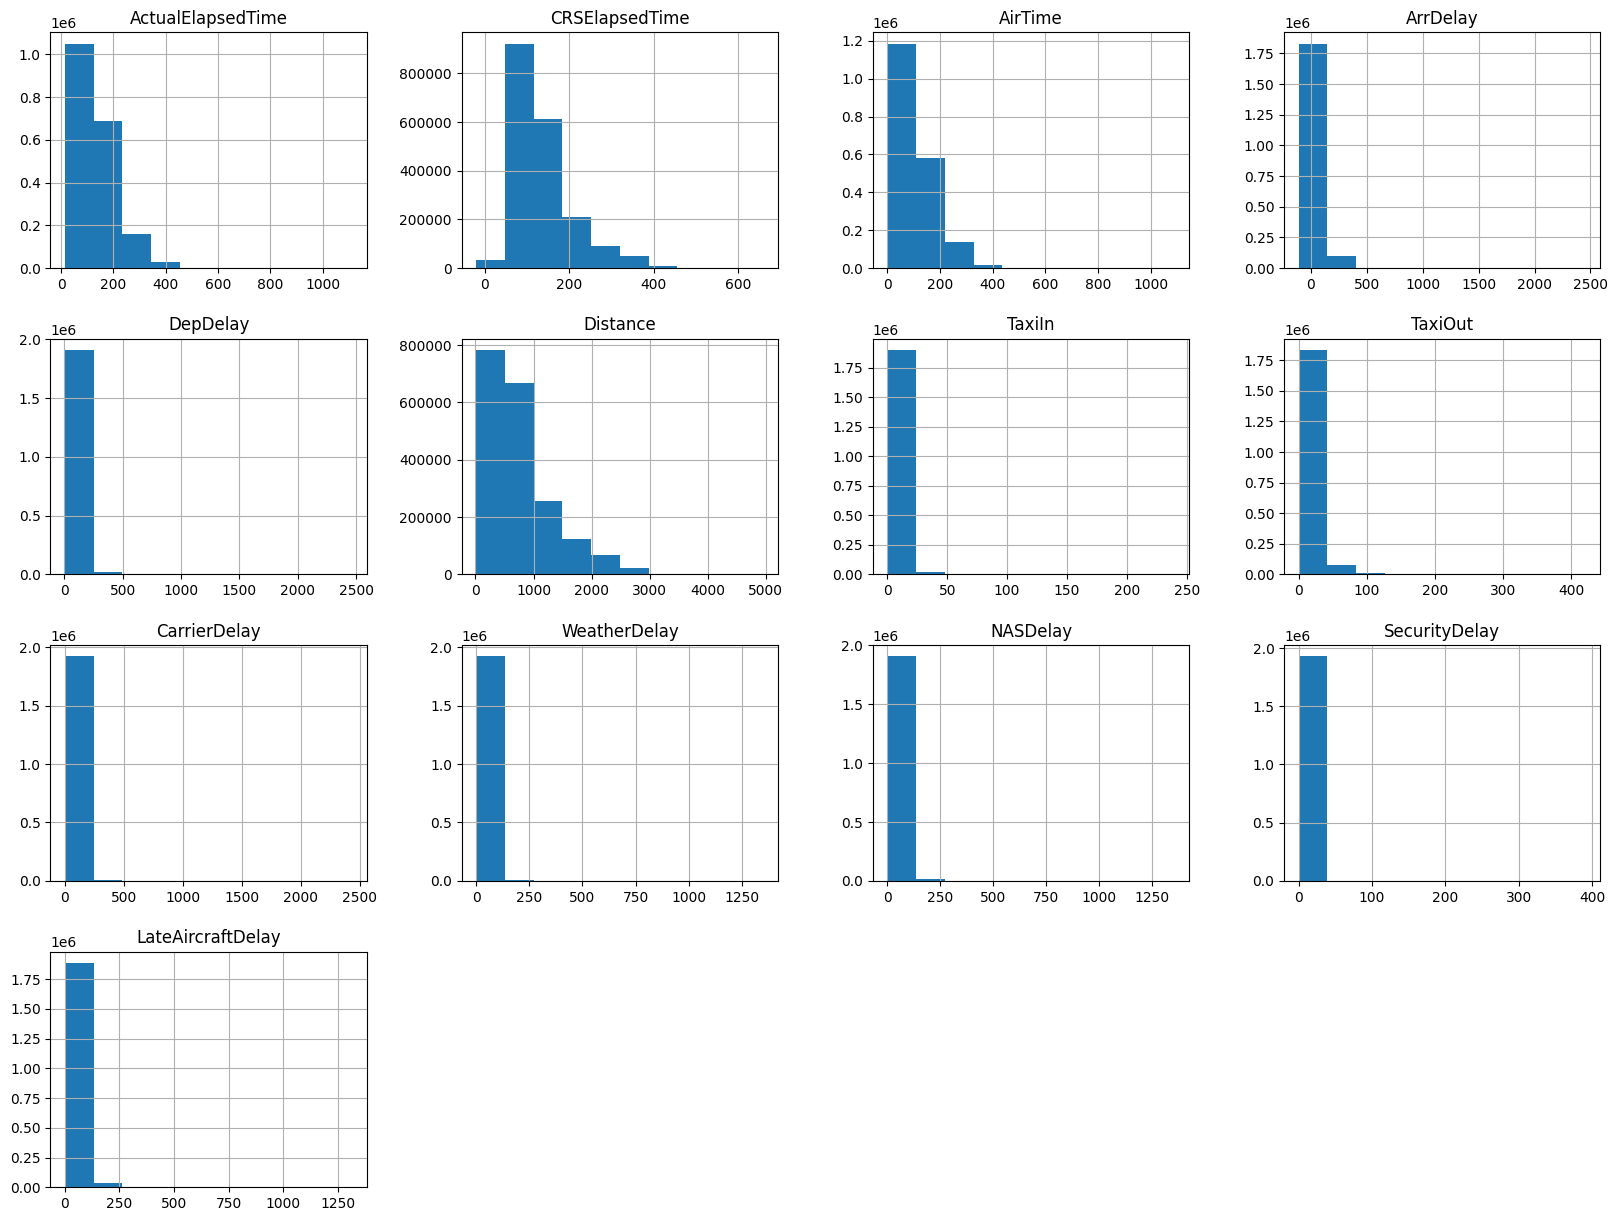

In [22]:
# Plot histograms for numerical columns
df.select_dtypes(include=["float64", "int64"]).hist(figsize=(20, 15))
plt.show()



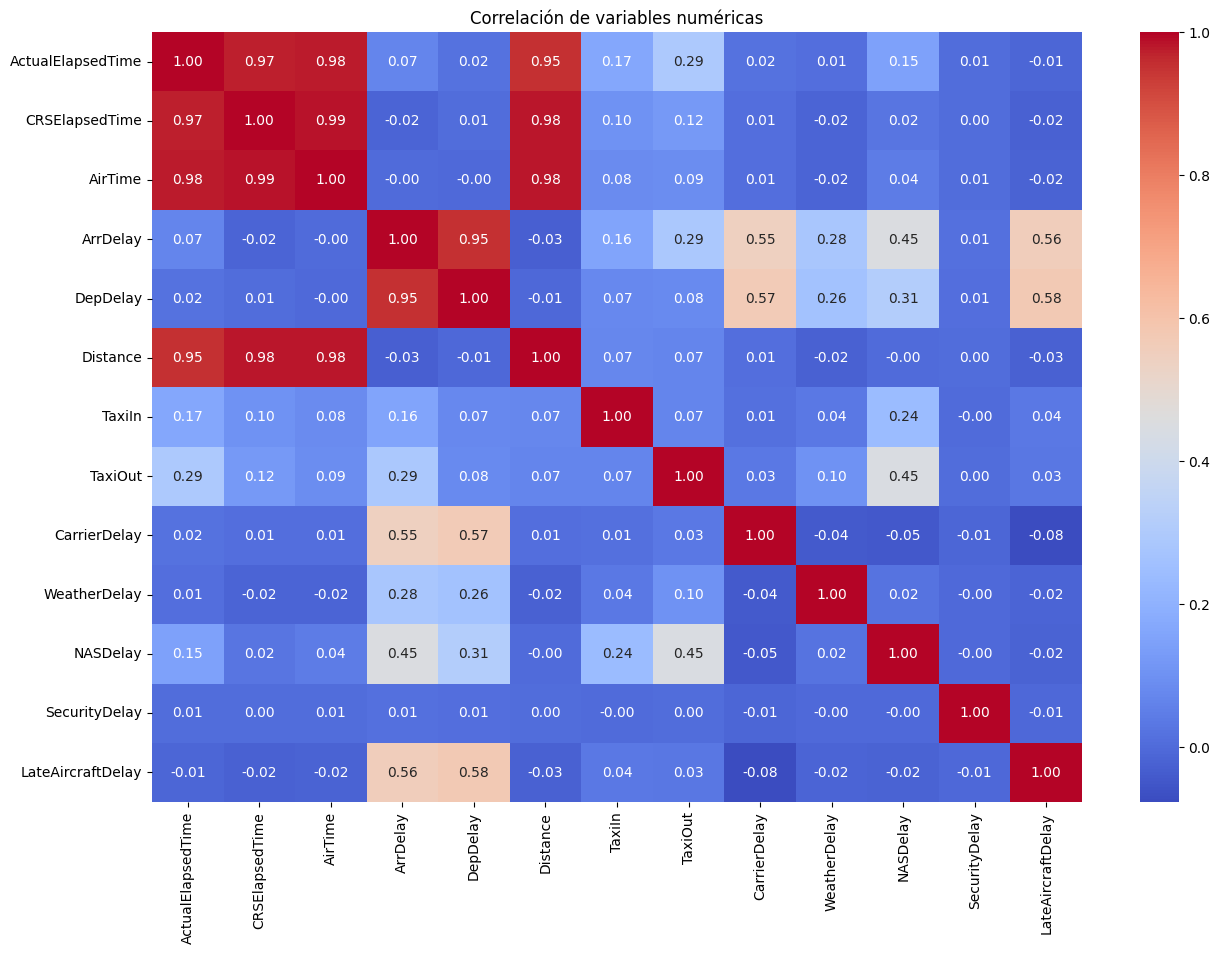

In [23]:
# Correlaciones
plt.figure(figsize=(15, 10))
plt.title("Correlación de variables numéricas")
sns.heatmap(df.select_dtypes(include=["float64", "int64"]).corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()



#### Por Aerolínea

<Axes: title={'center': '% de vuelos atrasados por aerolinea'}>

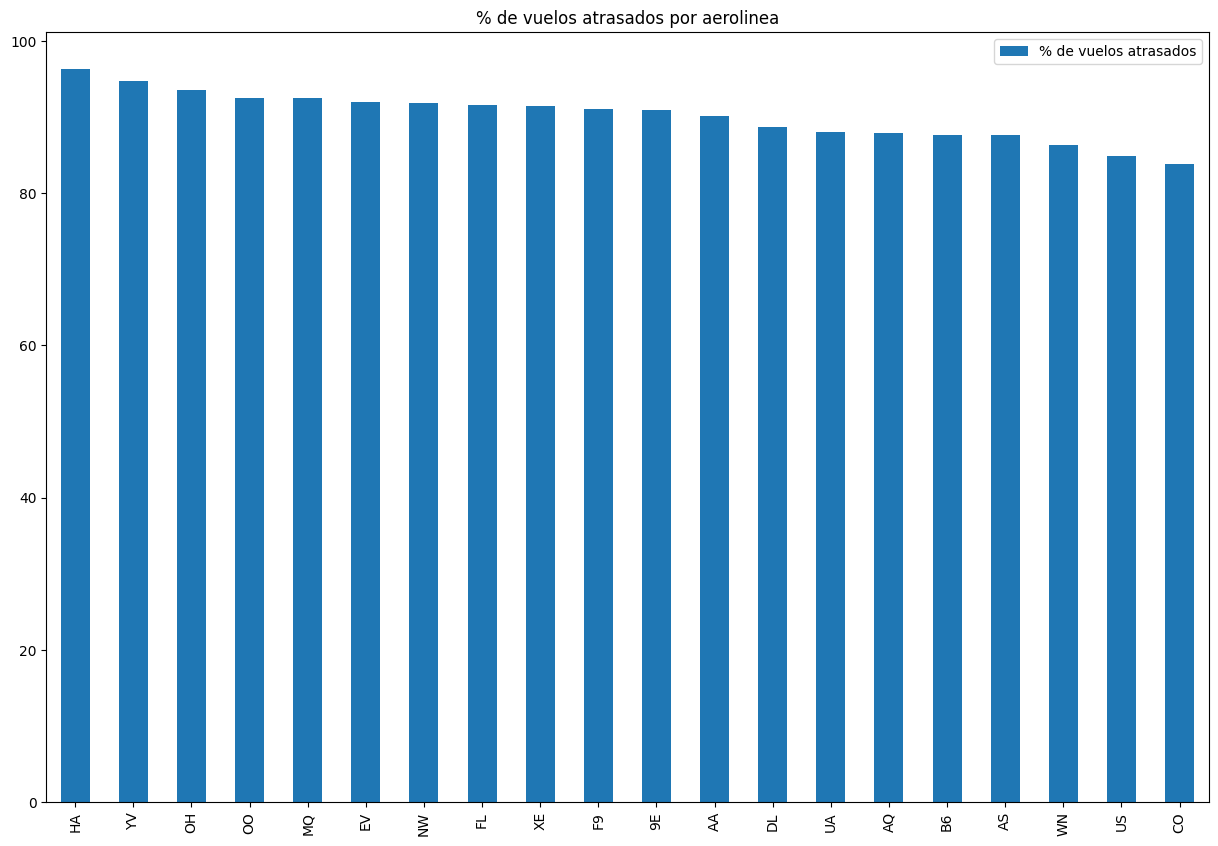

In [24]:
# Porcentaje de vuelos atrasados por aerolinea

aerolineas = {}
for i in df['UniqueCarrier'].unique():
    aerolineas[i] = [df[df['UniqueCarrier'] == i].shape[0], df[(df['UniqueCarrier'] == i) & (df['ArrDelay'] > 0)].shape[0]]

aerolineas = pd.DataFrame(aerolineas, index=['Total', 'Delayed']).T
aerolineas['% de vuelos atrasados'] = aerolineas['Delayed'] / aerolineas['Total'] * 100
aerolineas = aerolineas.sort_values('% de vuelos atrasados', ascending=False)
aerolineas.plot(kind='bar', y='% de vuelos atrasados', figsize=(15, 10), title='% de vuelos atrasados por aerolinea')



<Axes: title={'center': 'Minutos de atraso promedio por aerolínea (Por atraso de salida)'}>

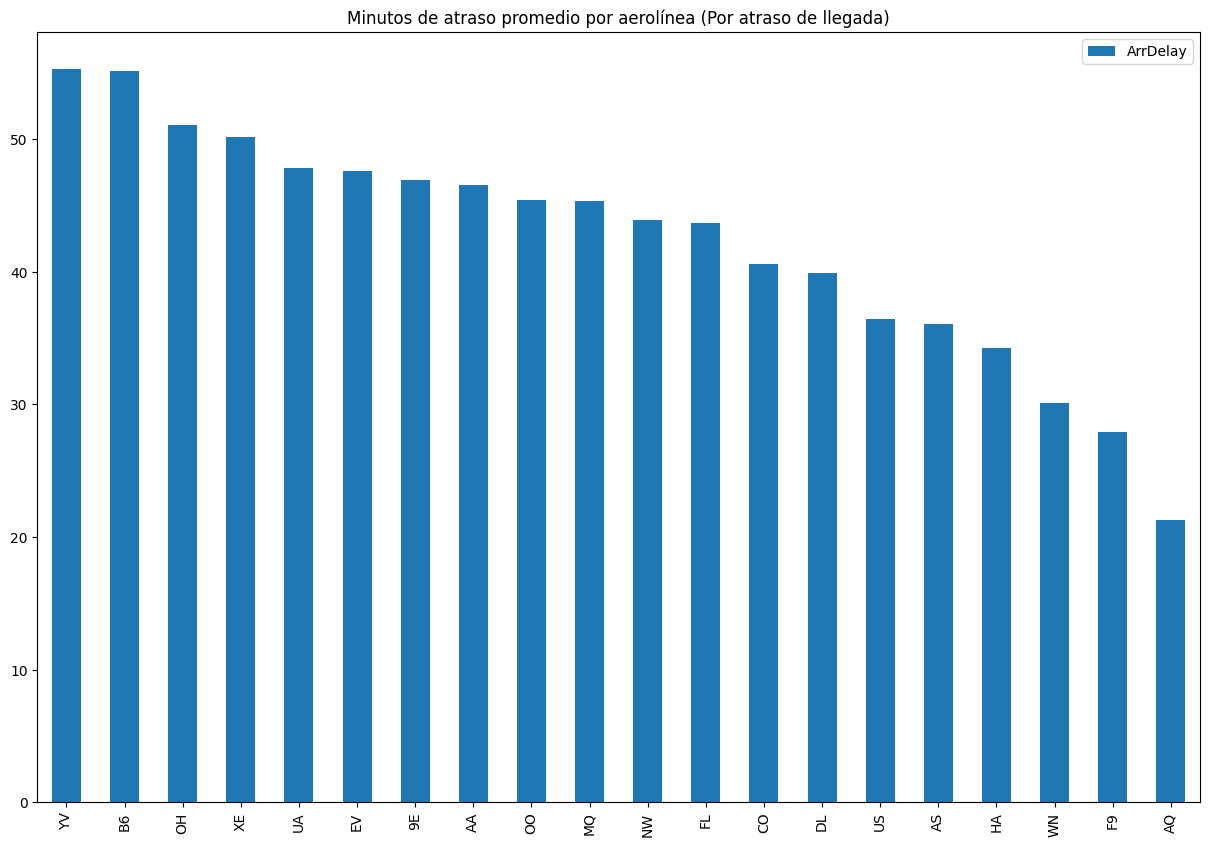

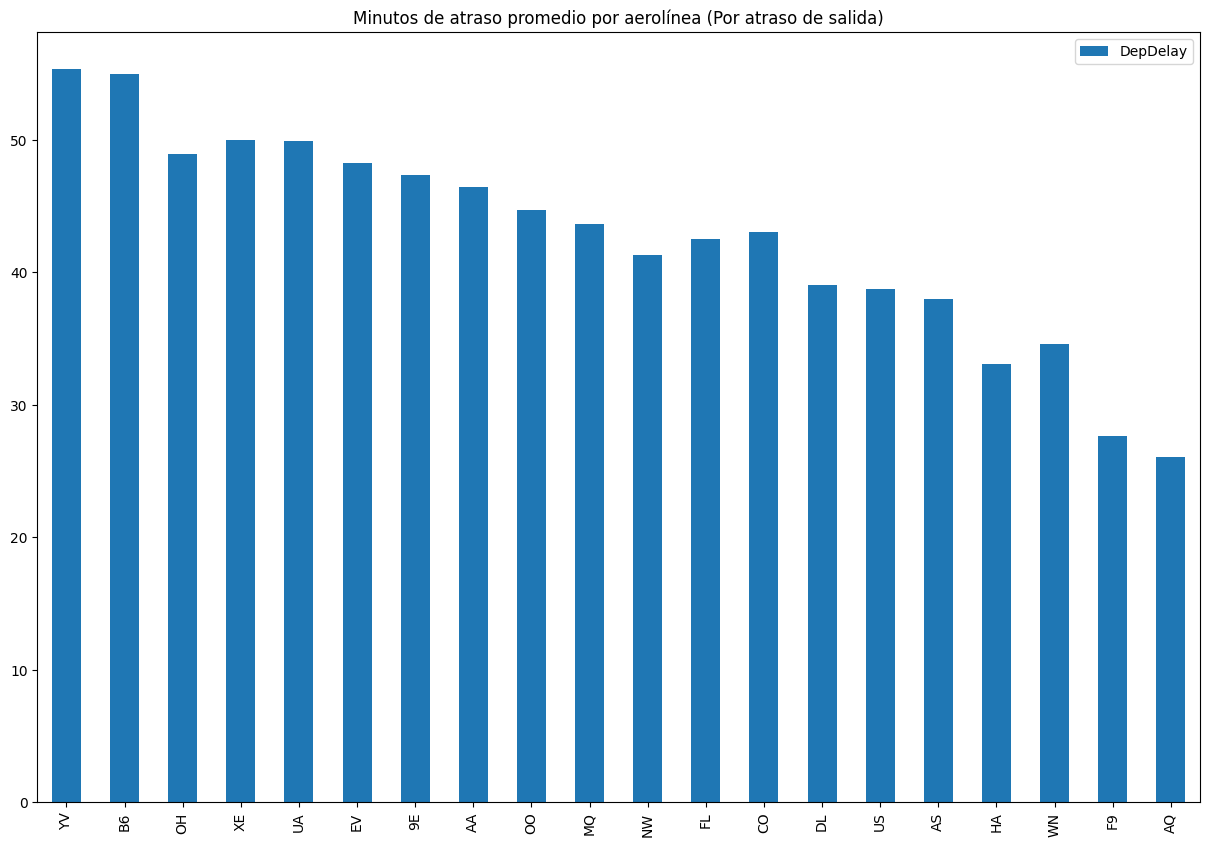

In [25]:
# Atrasos promedio por aerolínea
aerolinea_atrasos_promedio = {}
for i in df['UniqueCarrier'].unique():
    aerolinea_atrasos_promedio[i] = [df[df['UniqueCarrier'] == i]['ArrDelay'].mean(), df[df['UniqueCarrier'] == i]['DepDelay'].mean()]

aerolinea_atrasos_promedio = pd.DataFrame(aerolinea_atrasos_promedio, index=['ArrDelay', 'DepDelay']).T
aerolinea_atrasos_promedio = aerolinea_atrasos_promedio.sort_values('ArrDelay', ascending=False)

aerolinea_atrasos_promedio.plot(kind='bar', y='ArrDelay', figsize=(15, 10), title='Minutos de atraso promedio por aerolínea (Por atraso de llegada)')
aerolinea_atrasos_promedio.plot(kind='bar', y='DepDelay', figsize=(15, 10), title='Minutos de atraso promedio por aerolínea (Por atraso de salida)')



#### Por día de la semana y mes

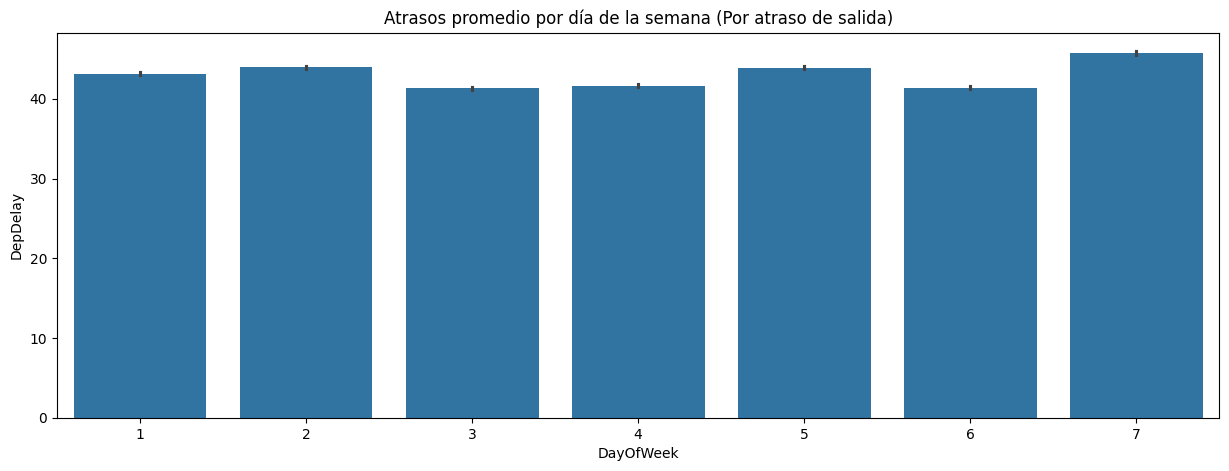

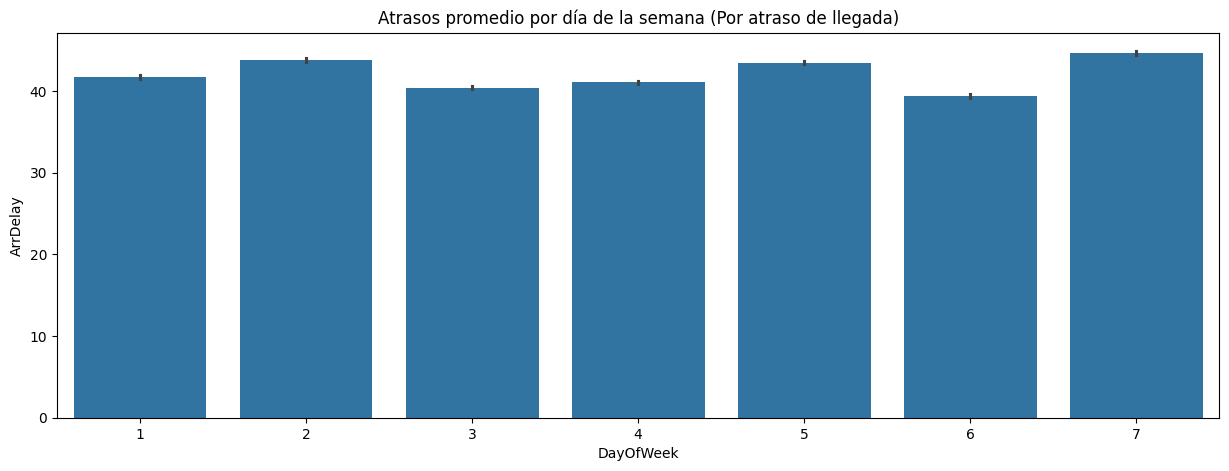

In [26]:
# Atrasos promedio por día de la semana
plt.figure(figsize=(15, 5))
plt.title('Atrasos promedio por día de la semana (Por atraso de salida)')
sns.barplot(data=df, x='DayOfWeek', y='DepDelay')
plt.show()

plt.figure(figsize=(15, 5))
plt.title('Atrasos promedio por día de la semana (Por atraso de llegada)')
sns.barplot(data=df, x='DayOfWeek', y='ArrDelay')
plt.show()



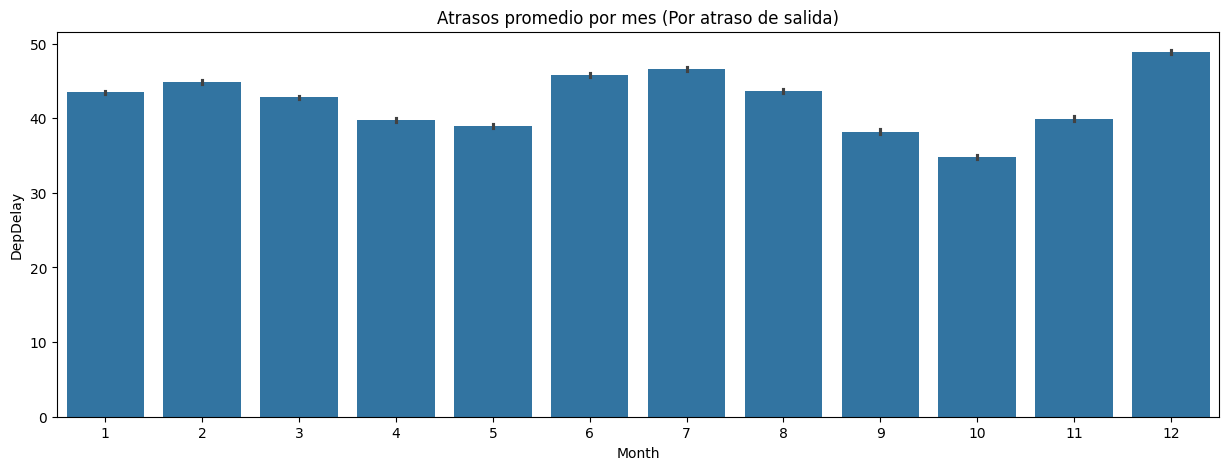

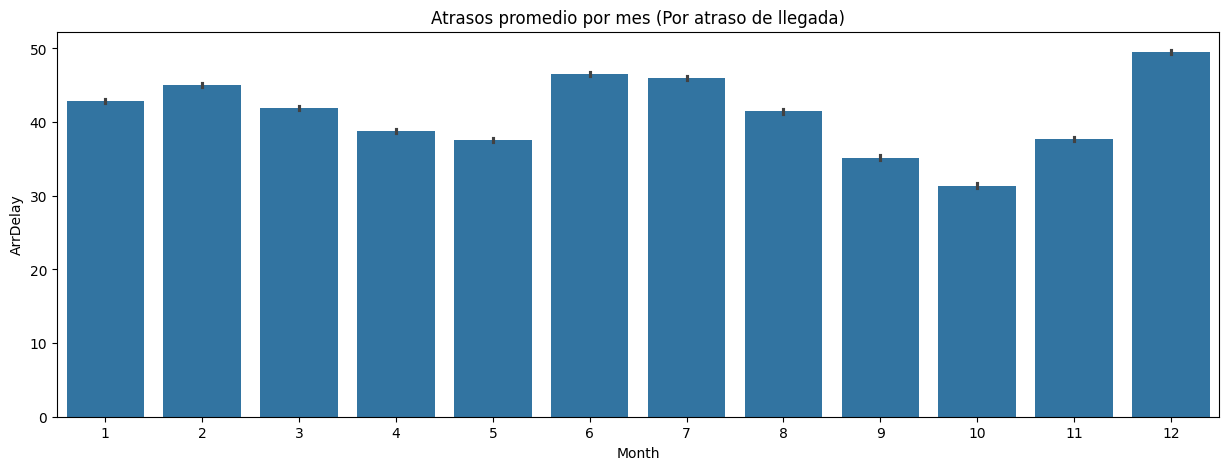

In [27]:
# Atrasos promedio por mes
plt.figure(figsize=(15, 5))
plt.title('Atrasos promedio por mes (Por atraso de salida)')
sns.barplot(data=df, x='Month', y='DepDelay')
plt.show()

plt.figure(figsize=(15, 5))
plt.title('Atrasos promedio por mes (Por atraso de llegada)')
sns.barplot(data=df, x='Month', y='ArrDelay')
plt.show()



#### Por aeropuertos

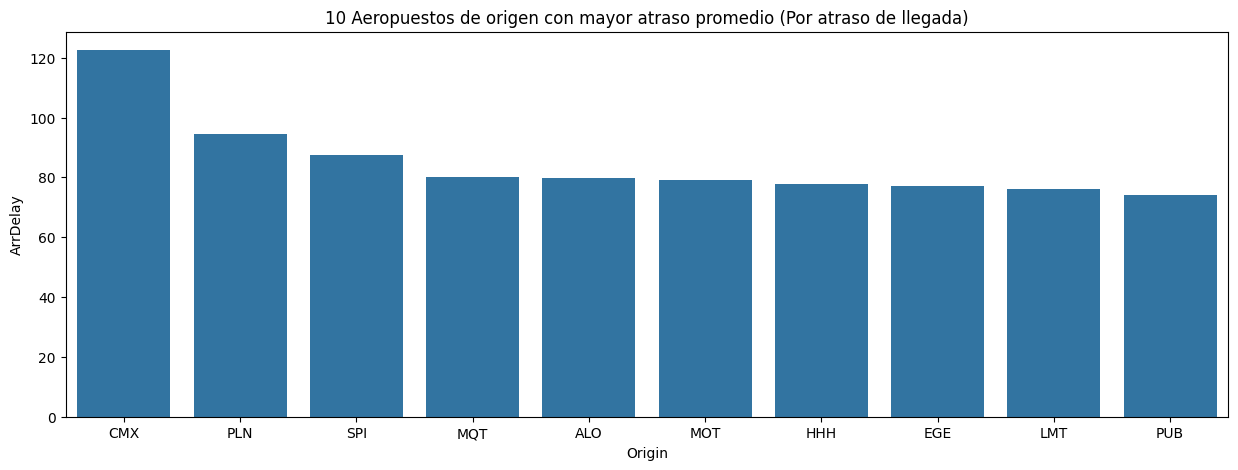

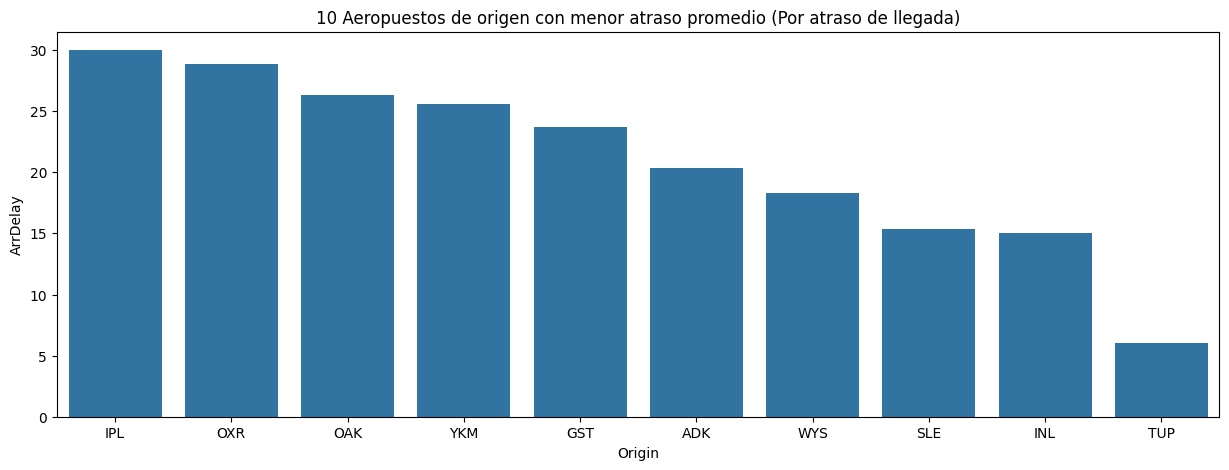

In [28]:
# 10 Aeropuertos de origen con mayor atraso promedio (Por atraso de llegada)

aero_delay_dict = {}
for aero in df['Origin'].unique():
    aero_delay_dict[aero] = df[df['Origin'] == aero]['ArrDelay'].mean()

aero_delay_df = pd.DataFrame(list(aero_delay_dict.items()), columns=['Origin', 'ArrDelay'])
aero_delay_df = aero_delay_df.sort_values(by='ArrDelay', ascending=False)

plt.figure(figsize=(15, 5)) 
plt.title('10 Aeropuestos de origen con mayor atraso promedio (Por atraso de llegada)')
sns.barplot(data=aero_delay_df.head(10), x='Origin', y='ArrDelay')
plt.show()

# 10 Aeropuestos de origen con menor atraso promedio (Por atraso de llegada)
plt.figure(figsize=(15, 5))
plt.title('10 Aeropuestos de origen con menor atraso promedio (Por atraso de llegada)')
sns.barplot(data=aero_delay_df.tail(10), x='Origin', y='ArrDelay')
plt.show()


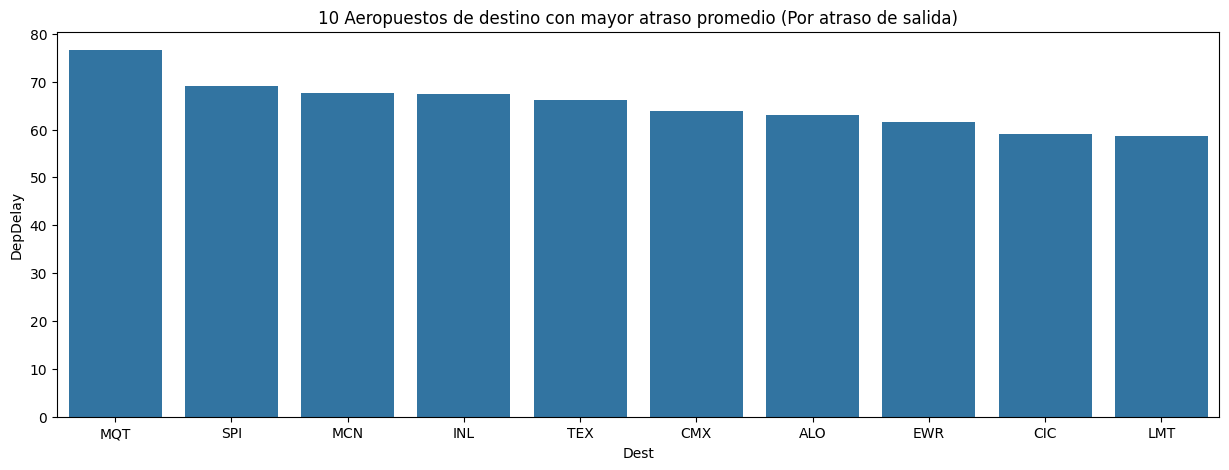

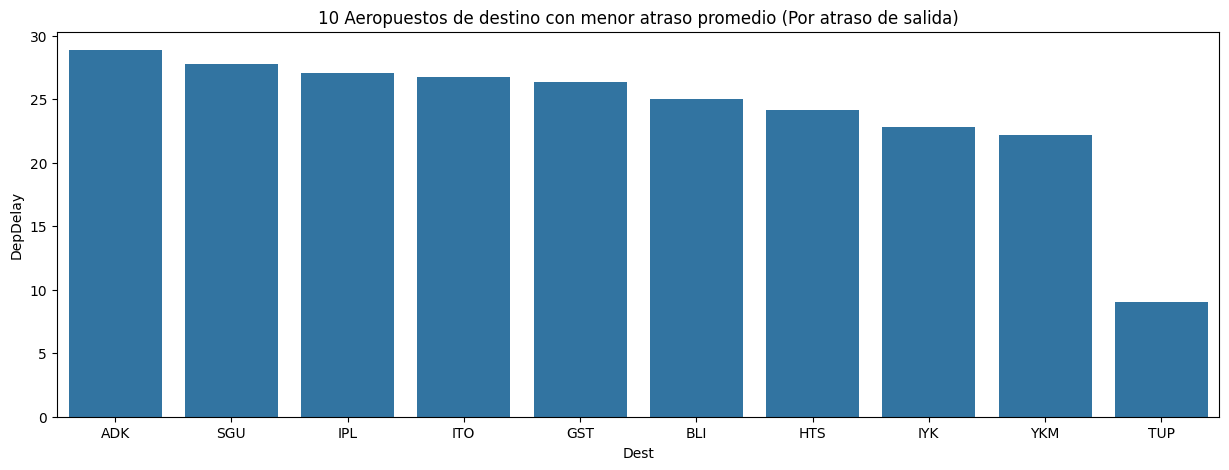

In [30]:
# 10 Aeropuertos de destino con mayor atraso promedio (Por atraso de salida)

aero_delay_dict = {}
for aero in df['Dest'].unique():
    aero_delay_dict[aero] = df[df['Dest'] == aero]['DepDelay'].mean()

aero_delay_df = pd.DataFrame(list(aero_delay_dict.items()), columns=['Dest', 'DepDelay'])
aero_delay_df = aero_delay_df.sort_values(by='DepDelay', ascending=False)   

plt.figure(figsize=(15, 5))
plt.title('10 Aeropuestos de destino con mayor atraso promedio (Por atraso de salida)')
sns.barplot(data=aero_delay_df.head(10), x='Dest', y='DepDelay')
plt.show()

# 10 Aeropuestos de destino con menor atraso promedio (Por atraso de salida)
plt.figure(figsize=(15, 5))
plt.title('10 Aeropuestos de destino con menor atraso promedio (Por atraso de salida)')
sns.barplot(data=aero_delay_df.tail(10), x='Dest', y='DepDelay')
plt.show()



Árbol de decisión

In [31]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV


In [32]:
X = df[['Month', 'DayofMonth', 'DayOfWeek', 'DepDelay', 'Distance']]
y_classification = (df['ArrDelay'] > 15).astype(int)  # Clasificación: si el vuelo se retrasó más de 15 minutos
y_regression = df['ArrDelay']  # Regresión: minutos de atraso



In [33]:
# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_classification, test_size=0.3, random_state=42)
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.3, random_state=42)



In [ ]:

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train_class)


DecisionTreeClassifier(random_state=42)

In [35]:
# Validación cruzada y evaluación
cross_val_scores = cross_val_score(clf, X_train, y_train_class, cv=5)
y_pred_class = cross_val_predict(clf, X_test, y_test_class, cv=5)


In [36]:
# Métricas de evaluación para Clasificación
accuracy = accuracy_score(y_test_class, y_pred_class)
precision = precision_score(y_test_class, y_pred_class)
recall = recall_score(y_test_class, y_pred_class)
f1 = f1_score(y_test_class, y_pred_class)

In [37]:
print("Clasificación - Métricas de rendimiento:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Cross-validation scores (accuracy):", cross_val_scores)

Clasificación - Métricas de rendimiento:
Accuracy: 0.7779229781283329
Precision: 0.8239981753780458
Recall: 0.8231476830081776
F1-Score: 0.8235727096201857
Cross-validation scores (accuracy): [0.77969197 0.77975123 0.78060688 0.7799134  0.7781095 ]


In [ ]:

reg = DecisionTreeRegressor(random_state=42)
reg.fit(X_train, y_train_reg)


DecisionTreeRegressor(random_state=42)

In [39]:
# Validación cruzada y evaluación
cross_val_scores_reg = cross_val_score(reg, X_train, y_train_reg, cv=5, scoring='neg_mean_squared_error')
y_pred_reg = cross_val_predict(reg, X_test, y_test_reg, cv=5)


In [40]:
# Métricas de evaluación para Regresión
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
mae = mean_absolute_error(y_test_reg, y_pred_reg)


In [41]:
print("\nRegresión - Métricas de rendimiento:")
print("RMSE:", rmse)
print("MAE:", mae)
print("Cross-validation scores (neg_mean_squared_error):", cross_val_scores_reg)


Regresión - Métricas de rendimiento:
RMSE: 25.031629479027277
MAE: 16.73898277935366
Cross-validation scores (neg_mean_squared_error): [-609.18058156 -617.31956312 -619.55787425 -613.44295694 -610.66336701]


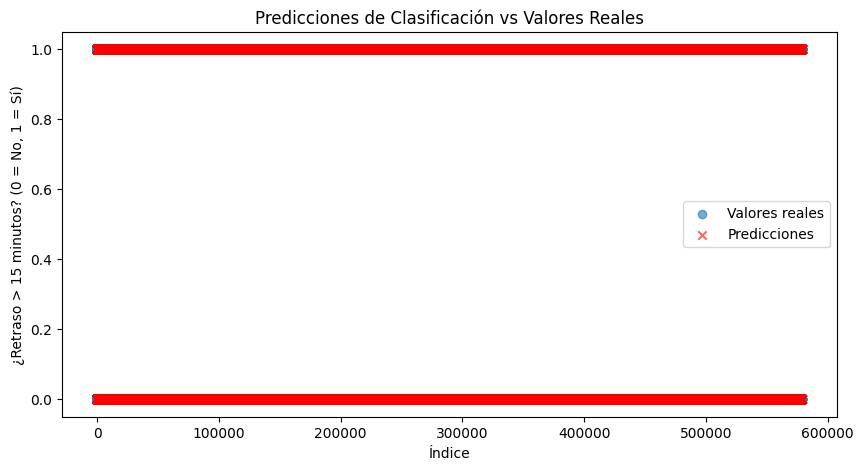

In [42]:
# %% Gráfico para visualización de la Clasificación
plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_test_class)), y_test_class, label='Valores reales', alpha=0.6)
plt.scatter(range(len(y_pred_class)), y_pred_class, label='Predicciones', alpha=0.6, marker='x', color='r')
plt.title('Predicciones de Clasificación vs Valores Reales')
plt.xlabel('Índice')
plt.ylabel('¿Retraso > 15 minutos? (0 = No, 1 = Sí)')
plt.legend()
plt.show()

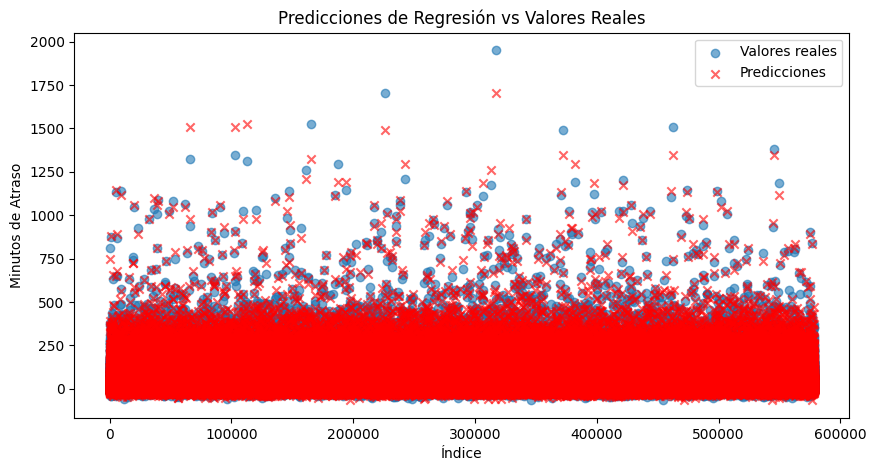

In [43]:
# %% Gráfico para visualización de la Regresión
plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_test_reg)), y_test_reg, label='Valores reales', alpha=0.6)
plt.scatter(range(len(y_pred_reg)), y_pred_reg, label='Predicciones', alpha=0.6, marker='x', color='r')
plt.title('Predicciones de Regresión vs Valores Reales')
plt.xlabel('Índice')
plt.ylabel('Minutos de Atraso')
plt.legend()
plt.show()

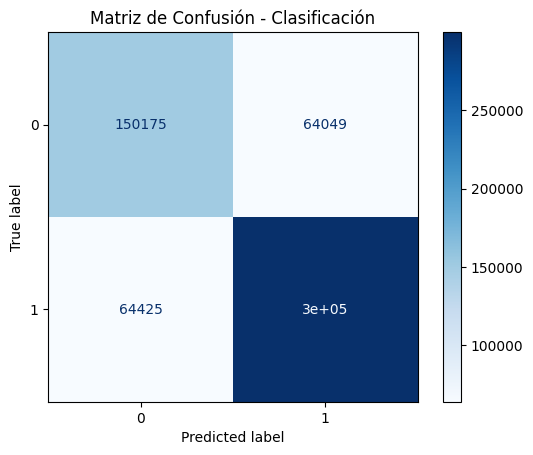

In [44]:
# %% Matriz de confusión para la Clasificación
conf_matrix = confusion_matrix(y_test_class, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')
plt.title('Matriz de Confusión - Clasificación')
plt.show()

C:\Users\rodas\AppData\Local\Temp\ipykernel_1716\3308967349.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'k--', lw=2, color='red')


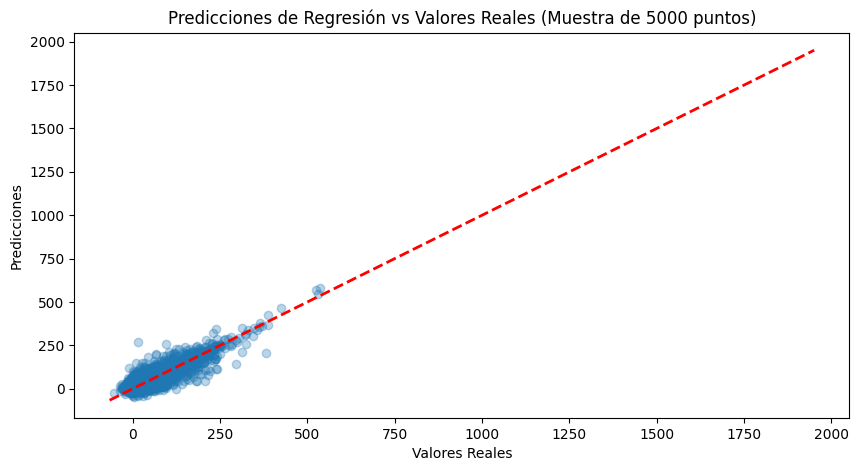

In [ ]:

sample_size = min(len(y_test_reg), 5000)  
indices = np.random.choice(range(len(y_test_reg)), sample_size, replace=False)

plt.figure(figsize=(10, 5))
plt.scatter(y_test_reg.iloc[indices], y_pred_reg[indices], alpha=0.3)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'k--', lw=2, color='red')
plt.title('Predicciones de Regresión vs Valores Reales (Muestra de 5000 puntos)')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.show()

In [ ]:
param_grid_class = {
    'max_depth': [None, 10, 20, 30],  # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras necesarias para dividir un nodo
    'min_samples_leaf': [1, 2, 5],    # Número mínimo de muestras necesarias en una hoja
    'criterion': ['gini', 'entropy']  # Criterio de división
}

In [ ]:

clf = DecisionTreeClassifier(random_state=42)

In [ ]:
# Búsqueda de hiperparámetros con GridSearchCV
grid_search_class = GridSearchCV(estimator=clf, param_grid=param_grid_class, cv=5, scoring='accuracy', verbose=2)
grid_search_class.fit(X_train, y_train_class)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   4.4s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   4.5s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   4.3s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   4.3s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   4.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   4.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   4.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   4.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   4.2s
[CV] END criterion=gini, max_

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=2)

In [ ]:
print("Mejores hiperparámetros para Clasificación:", grid_search_class.best_params_)

Mejores hiperparámetros para Clasificación: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [46]:
param_grid_reg = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['squared_error']
}


In [47]:
# Crear el modelo base
reg = DecisionTreeRegressor(random_state=42)

In [48]:
# Búsqueda de hiperparámetros con GridSearchCV
grid_search_reg = GridSearchCV(estimator=reg, param_grid=param_grid_reg, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search_reg.fit(X_train, y_train_reg)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END criterion=squared_error, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   5.6s
[CV] END criterion=squared_error, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   5.6s
[CV] END criterion=squared_error, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   5.6s
[CV] END criterion=squared_error, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   5.5s
[CV] END criterion=squared_error, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   5.6s
[CV] END criterion=squared_error, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   5.0s
[CV] END criterion=squared_error, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   5.0s
[CV] END criterion=squared_error, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   5.0s
[CV] END criterion=squared_error, max_depth=None, min_sampl

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'criterion': ['squared_error'],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5]},
             scoring='neg_mean_squared_error', verbose=2)

In [49]:
# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros para Regresión:", grid_search_reg.best_params_)

Mejores hiperparámetros para Regresión: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [50]:
clf_best = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=10,
    min_samples_leaf=5,
    min_samples_split=2,
    random_state=42
)

In [51]:
# Entrenar el modelo con los datos de entrenamiento
clf_best.fit(X_train, y_train_class)

# Realizar predicciones con el modelo ajustado
y_pred_class_best = clf_best.predict(X_test)


In [52]:
# Evaluar el modelo ajustado
accuracy = accuracy_score(y_test_class, y_pred_class_best)
precision = precision_score(y_test_class, y_pred_class_best)
recall = recall_score(y_test_class, y_pred_class_best)
f1 = f1_score(y_test_class, y_pred_class_best)

In [53]:
print("Clasificación - Métricas de rendimiento con los mejores hiperparámetros:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Clasificación - Métricas de rendimiento con los mejores hiperparámetros:
Accuracy: 0.8388327966106089
Precision: 0.9036629752962131
Recall: 0.832843335062739
F1-Score: 0.8668090425341952


In [54]:
# %% Modelo de Regresión con los mejores hiperparámetros
reg_best = DecisionTreeRegressor(
    criterion='squared_error',
    max_depth=10,
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=42
)

In [55]:
# Entrenar el modelo con los datos de entrenamiento
reg_best.fit(X_train, y_train_reg)

# Realizar predicciones con el modelo ajustado
y_pred_reg_best = reg_best.predict(X_test)

In [56]:
# Evaluar el modelo ajustado
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg_best))
mae = mean_absolute_error(y_test_reg, y_pred_reg_best)

In [57]:
print("\nRegresión - Métricas de rendimiento con los mejores hiperparámetros:")
print("RMSE:", rmse)
print("MAE:", mae)


Regresión - Métricas de rendimiento con los mejores hiperparámetros:
RMSE: 17.18514546356638
MAE: 11.25992122574959


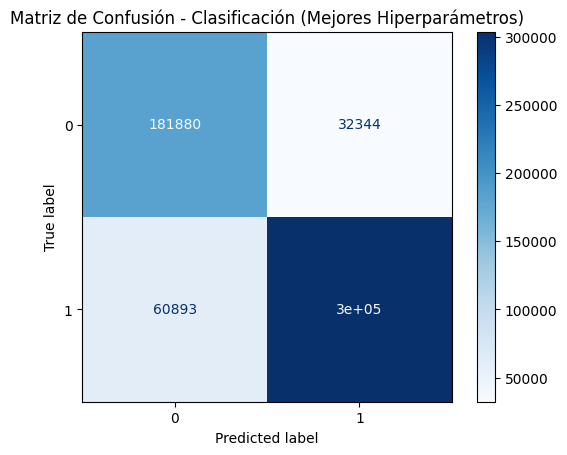

In [58]:
# %% Gráfico de la Matriz de Confusión para Clasificación
conf_matrix_best = confusion_matrix(y_test_class, y_pred_class_best)
disp_best = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_best)
disp_best.plot(cmap='Blues')
plt.title('Matriz de Confusión - Clasificación (Mejores Hiperparámetros)')
plt.show()

C:\Users\rodas\AppData\Local\Temp\ipykernel_1716\4184981213.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'k--', lw=2, color='red')


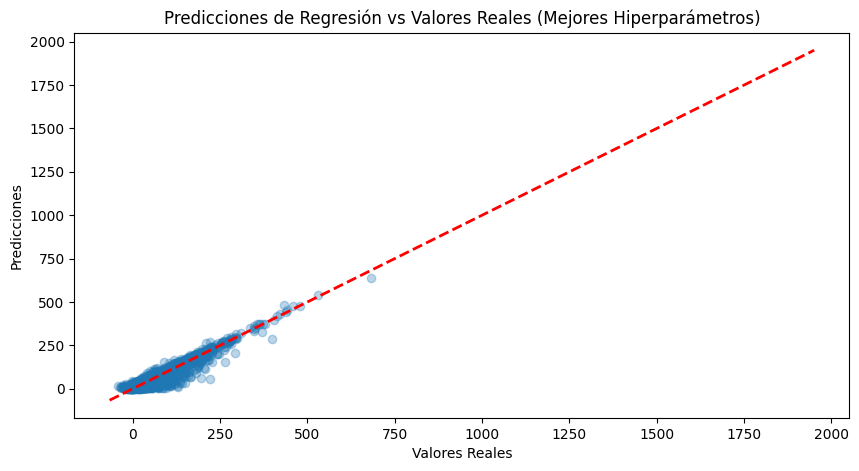

In [59]:
# %% Gráfico de Dispersión para la Regresión (con muestra limitada)
sample_size = min(len(y_test_reg), 5000)  # Limitar a 5000 puntos para mejor visualización
indices = np.random.choice(range(len(y_test_reg)), sample_size, replace=False)

plt.figure(figsize=(10, 5))
plt.scatter(y_test_reg.iloc[indices], y_pred_reg_best[indices], alpha=0.3)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'k--', lw=2, color='red')
plt.title('Predicciones de Regresión vs Valores Reales (Mejores Hiperparámetros)')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.show()

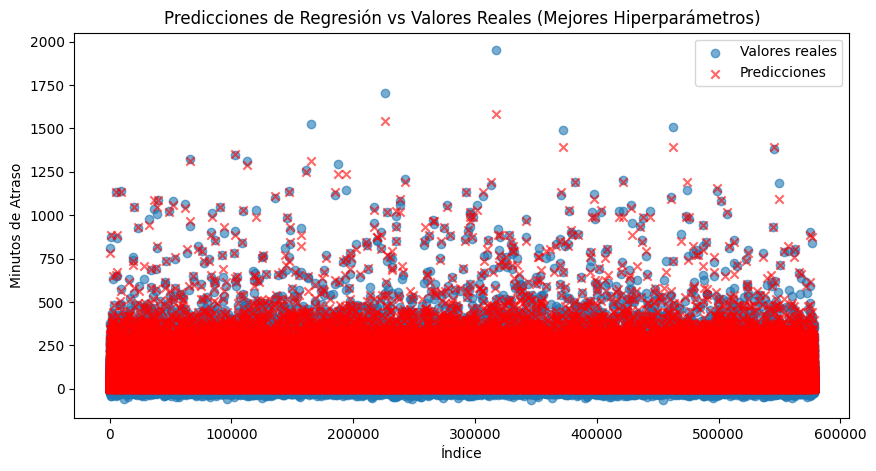

In [60]:
# %% Gráfico de las Predicciones de Regresión vs Valores Reales (Mejores Hiperparámetros)
plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_test_reg)), y_test_reg, label='Valores reales', alpha=0.6)
plt.scatter(range(len(y_pred_reg_best)), y_pred_reg_best, label='Predicciones', alpha=0.6, marker='x', color='r')
plt.title('Predicciones de Regresión vs Valores Reales (Mejores Hiperparámetros)')
plt.xlabel('Índice')
plt.ylabel('Minutos de Atraso')
plt.legend()
plt.show()
